Chapter 16

# 六条PCA路线
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#%% self-defined PCA function

def PCA(X, method = 'demean'):
    
    n = len(X) 
    # number of sample data
    
    if method == 'original':
        XX = X.dropna()
        GG = (XX.T @ XX)/(n - 1) 
        # devided by (n-1) to make results comparable
        variance_V, V = np.linalg.eig(GG)
        
    elif method == 'demean':
        XX = (X - X.mean()).dropna()
        GG = XX.T @ XX/(n - 1)
        variance_V, V = np.linalg.eig(GG)
        
    elif method == 'normalize':
        XX = (X - X.mean())/X.std().dropna()
        GG = XX.T @ XX/(n - 1)
        variance_V, V = np.linalg.eig(GG)
        
    else:
            print('Method does not exist. '
                  'Choose from original, demean, and normalize')
            
    original_variance = np.diag(GG)
   
    explained_variance_ratio = variance_V / np.sum(variance_V)
    return [explained_variance_ratio, 
            variance_V, V, 
            original_variance, GG, XX]

In [3]:
#%% visualization tools

# ==================================================
# Define a function for plotting vector on a plane
# ==================================================

def draw_vector(v,RBG,label):
    array = np.array([[0,0,v[0],v[1]]])
    X,Y,U,V = zip(*array)
    plt.quiver(X,Y,U,V,
              angles='xy', 
              scale_units='xy',
              scale = 1,
              color = RBG,
              label = label)

In [4]:
# ==================================================
# Define a function for plotting EVD
# ==================================================

def heatmap_EVD(GG,Lambdas,V):
    

    fig,axs = plt.subplots(1,7,figsize = (18,5))
    
    plt.sca(axs[0])
    ax = sns.heatmap(GG, cmap = 'RdYlBu_r',
                    # vmax = D_max, vmin = D_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False,
                    square = 'equal')
    plt.title('$A$')
    
    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(V, cmap = 'RdYlBu_r',
                    vmax = 1, vmin = -1,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False,
                    square = 'equal')
    plt.title('$V$')
    
    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')    
    
    plt.sca(axs[4])
    ax = sns.heatmap(np.diag(Lambdas), cmap = 'RdYlBu_r',
                    # vmax = D_max, vmin = D_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False,
                    square = 'equal')
    plt.title('$\Lambda$')

    plt.sca(axs[5])
    plt.title('@')
    plt.axis('off')    
    
    plt.sca(axs[6])
    ax = sns.heatmap(V.T, cmap = 'RdYlBu_r',
                    vmax = 1, vmin = -1,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False,
                    square = 'equal')
    plt.title('$V^T$')
 

In [5]:
   
# ==================================================
# Define a function for plotting GG and Lambda
# ==================================================

def heatmap_GG(GG, variance_V):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    
    x_axis_labels = ['$X_' + str(index + 1) + '$' for index in range(len(X.columns))]
    y_axis_labels = X.columns
    sns.heatmap(GG, 
                ax = ax[0], 
                xticklabels=x_axis_labels, 
                yticklabels=y_axis_labels,
                vmin = np.minimum(GG, variance_V).min().min(),
                vmax = np.maximum(GG, variance_V).max().max(),
                annot = True,
                square = 'equal',
                cmap = 'RdYlBu_r', linewidths = 0.1,
                cbar=False, fmt='.3f')
    ax[0].set_title('Orginal')
    ax[0].tick_params(axis='y', rotation=90)

    x_axis_labels = ['$PC_' + str(index + 1) + '$' for index in range(len(X.columns))]
    
    sns.heatmap(np.diag(variance_V), 
                ax = ax[1], 
                xticklabels=x_axis_labels, 
                yticklabels=x_axis_labels,
                vmin = np.minimum(GG, variance_V).min().min(),
                vmax = np.maximum(GG, variance_V).max().max(),
                annot = True,
                square = 'equal',
                cmap = 'RdYlBu_r', linewidths = 0.1,
                cbar=False, fmt='.3f')
    ax[1].set_title('Lambdas')
    ax[1].tick_params(axis='y', rotation=90) 

In [6]:
# ==================================================
# Define a function for plotting heatmap of matrix V
# ==================================================

def heatmap_V(V,X,title):
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    x_axis_labels = ['$PC_' + str(index + 1) + '$' for index in range(len(X.columns))]
    y_axis_labels = X.columns
    sns.heatmap(V, 
                ax = ax, 
                xticklabels=x_axis_labels, 
                yticklabels=y_axis_labels,
                vmin = -1,
                vmax = 1,
                annot = True,
                square = 'equal',
                cmap = 'RdYlBu_r', linewidths = 0.1,
                cbar=False)
    ax.set_title(title)
    plt.yticks(rotation=0) 

In [7]:
# ==================================================
# Define a function of generating biplot 
# ==================================================
def biplot(V,X,title):
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    y_axis_labels = X.columns
    
    RBGs = ['r','b','g','orange']
    
    for i, (RBG_i, label) in enumerate(zip(RBGs, y_axis_labels)):
        
        v = V[i,[0,1]]
        
        draw_vector(v,RBG_i,label)
    
    circ = plt.Circle((0, 0), radius=1, edgecolor='k', linestyle = '--', facecolor='None')
    ax.add_patch(circ)
    plt.xlabel('$PC_1$, $v_1$')
    plt.ylabel('$PC_2$, $v_2$')
    plt.legend()
    plt.xticks(np.linspace(-1,1,5))
    plt.yticks(np.linspace(-1,1,5))
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.grid(color = [0.6,0.6,0.6])
    ax.set_title(title)
    

In [8]:
# ==================================================
# Define a function of generating 6 biplots
# lower triangle arrangment
# ==================================================

def six_biplots(V,X):
    
    fig = plt.figure(figsize=(18,18))
    
    y_axis_labels = X.columns
    
    RBGs = ['r','b','g','orange']
    PC_combos = [[0,1],[0,2],[1,2],[0,3],[1,3],[2,3]]
    
    for fig_i,PC_combo_i in zip([1, 4, 5, 7, 8, 9], PC_combos): # lower triangle
    
        plt.subplot(3,3,fig_i)
    
        for i, (RBG_i, label) in enumerate(zip(RBGs, y_axis_labels)):
            
            # print(PC_combo_i)
            v = V[i,PC_combo_i]
            
            draw_vector(v,RBG_i,label)
            
        plt.legend(loc = 'best')
        plt.xticks(np.linspace(-1,1,5))
        plt.yticks(np.linspace(-1,1,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.gca().set_box_aspect(1)
        # ax.set_box_aspect(1)
        plt.grid(color = [0.6,0.6,0.6])
    
    allaxes = fig.get_axes()
    
    for ax in allaxes:
        
        circ = plt.Circle((0, 0), radius=1, edgecolor='k', linestyle = '--', facecolor='None')
        ax.add_patch(circ)

    
    allaxes[3].set_xlabel('$PC_1$')
    allaxes[4].set_xlabel('$PC_2$')
    allaxes[5].set_xlabel('$PC_3$')
    
    allaxes[0].set_ylabel('$PC_2$')
    allaxes[1].set_ylabel('$PC_3$')
    allaxes[3].set_ylabel('$PC_4$')

# ==================================================
# Define a function of plotting pie and bar chats of 
# diagonal elements (varainces, lambdas, etc)
# ==================================================

In [9]:
def pie_and_barh(variance_array,bar_max,PCA = True):
    
    if PCA:
        
        labels = ['$PC_' + str(index) + '$' for index in [1,2,3,4]]
        
    else:
        labels = ['$X_' + str(index) + '$' for index in [1,2,3,4]]
        
    var_X2_drill_down_df = pd.DataFrame({'var':variance_array}, index = labels)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,9))
    
    # var_X2_drill_down_df.sort_values('var',inplace=True)
    var_X2_drill_down_df.plot.pie(y = 'var', autopct='%1.1f%%',wedgeprops={'alpha':0.5},
                                  legend = False, cmap='rainbow_r', ax = ax1)
    
    var_X2_drill_down_df.plot.barh(y = 'var', ax = ax2)
    ax2.set_xlim(0,bar_max)
    

In [10]:
# ==================================================
# Define a function of generating Scree plot 
# ==================================================

def Scree(explained_variance_ratio,variance_V):
    # double y plot
    
    PC_range = np.arange(len(explained_variance_ratio)) + 1
    labels = ['$PC_' + str(index) + '$' for index in PC_range]
    
    fig, ax1 = plt.subplots(figsize=(9,5))
    
    ax1.plot(PC_range, variance_V, 'b', marker = 'x')
    ax1.set_xlabel('PC')
    ax1.set_ylabel('PC variance', color='b')
    ax1.set_ylim(0,variance_V.max()*1.1)
    plt.xticks(np.linspace(PC_range.min(),PC_range.max(),len(PC_range)))

    ax2 = ax1.twinx()
    ax2.plot(PC_range, np.cumsum(explained_variance_ratio)*100, 'r', marker = 'x')
    ax2.set_ylabel('Ratio of explained variance (%)', color='r')
    ax2.set_ylim(0,105)
    
    plt.xlim(PC_range.min() - 0.1,PC_range.max() + 0.1)

    plt.show()

In [11]:
# ==================================================
# Visualize the Error matrix, when X is 
# projected onto selected principal components
# if p is undefined, X is only projected to tensor product
# of PC1, the first principal component
# ==================================================

def error_heatmap(X_,V_,p = 1):
    
    X_ = X_.to_numpy()
    X_reprod = X_*0
    
    for i in range(p):
        
        PC_i = V_[:,i].reshape((-1,1))

        X_reprod_i = X_@PC_i@PC_i.T
        X_reprod = X_reprod + X_reprod_i
    
    # calculate error
    E = X_ - X_reprod
    
    # print(X_reprod)

    fig,axs = plt.subplots(1,5,figsize = (16,6))

    X_max = np.max(X_)
    X_min = np.min(X_)
    
    plt.sca(axs[0])
    ax = sns.heatmap(E, cmap = 'RdYlBu_r',
                    vmax = X_max, vmin = X_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False)
    plt.title('Error, $E$')
    
    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(X_, cmap = 'RdYlBu_r',
                    vmax = X_max, vmin = X_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False)
    plt.title('Original, $X$')
    
    plt.sca(axs[3])
    plt.title('-')
    plt.axis('off')    
    
    plt.sca(axs[4])
    ax = sns.heatmap(X_reprod, cmap = 'RdYlBu_r',
                    vmax = X_max, vmin = X_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False)
    plt.title('Reproduced, $\hat{X}$')

In [12]:
def projection_heatmap(X_,V_):
    
    X_ = X_.to_numpy()
    Y = X_@V_

    fig,axs = plt.subplots(1,5,figsize = (16,6))

    X_max = np.max(X_)
    X_min = np.min(X_)
    
    plt.sca(axs[0])
    ax = sns.heatmap(Y, cmap = 'RdYlBu_r',
                    vmax = X_max, vmin = X_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False)
    plt.title('$Y$')
    
    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(X_, cmap = 'RdYlBu_r',
                    vmax = X_max, vmin = X_min,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False)
    plt.title('$X$')
    
    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')    
    
    plt.sca(axs[4])
    ax = sns.heatmap(V_, cmap = 'RdYlBu_r',
                    vmax = 1, vmin = -1,
                    cbar_kws = {'orientation':'horizontal'},
                    yticklabels=False,square = 'equal')
    plt.title('$V$')
 

In [13]:
   
#%% import dataset of iris data from seaborn

X = sns.load_dataset("iris")
X = X.drop(columns=['species'])

# X = X.rename(columns={'sepal_length': 'Sepal length',
#                       'sepal_width':  'Sepal width',
#                       'petal_length': 'Petal length',
#                       'petal_width':  'Petal width'})

# rename column headers
X = X.rename(columns={'sepal_length': '$X_1$',
                      'sepal_width':  '$X_2$',
                      'petal_length': '$X_3$',
                      'petal_width':  '$X_4$'})

#%%

## 第一条技术路线

In [51]:
# ==================================================
# Perform PCA on the demeaned data
# by eigen decomposing covariance matrix
# ==================================================

explained_variance_ratio_c, variance_V_c, V_c, original_variance_c, GG_c, X_c = PCA(X, method = 'demean')

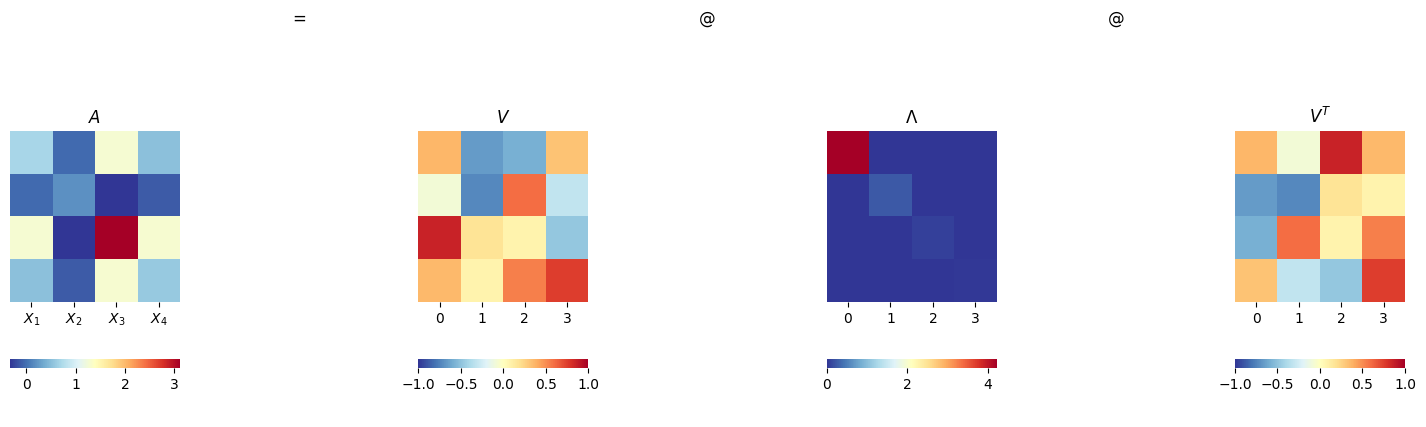

In [15]:
# heatmap of EVD
heatmap_EVD(GG_c,variance_V_c,V_c)

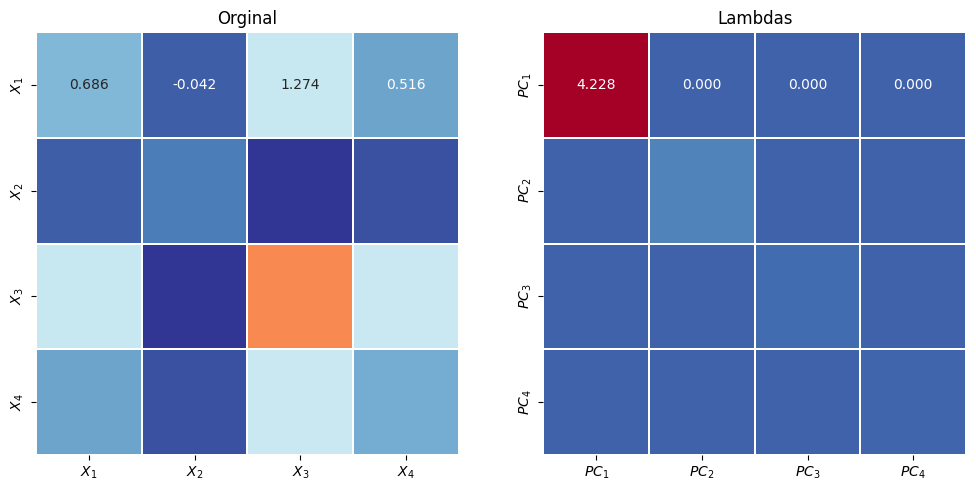

In [16]:
# heatmap of before and after eigen decomposition

heatmap_GG(GG_c, variance_V_c)

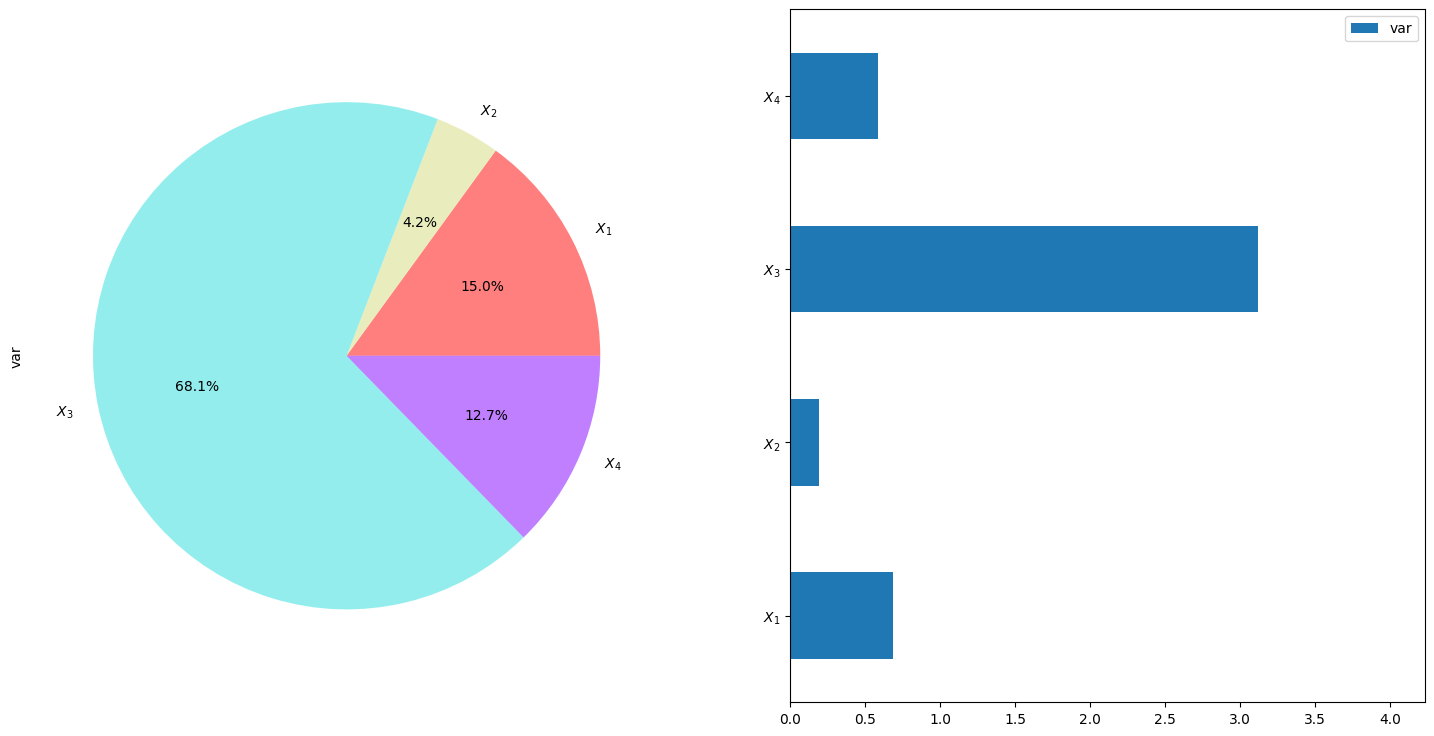

In [17]:
bar_max = np.maximum(original_variance_c, variance_V_c).max().max()
pie_and_barh(original_variance_c,bar_max,PCA = False)

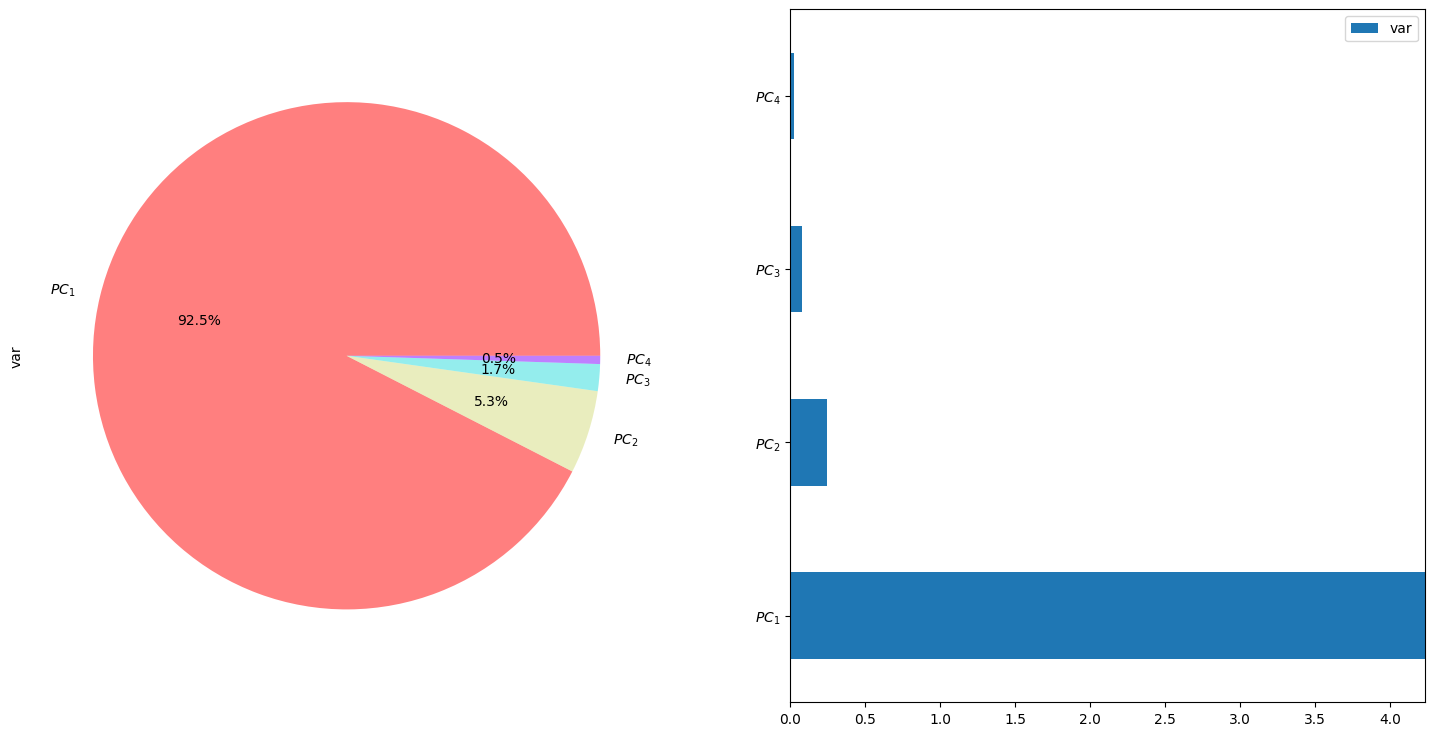

In [18]:
pie_and_barh(variance_V_c,bar_max,PCA = True)

In [19]:
cov_X = X.cov()
sum_variance = np.diag(cov_X).sum() # test only

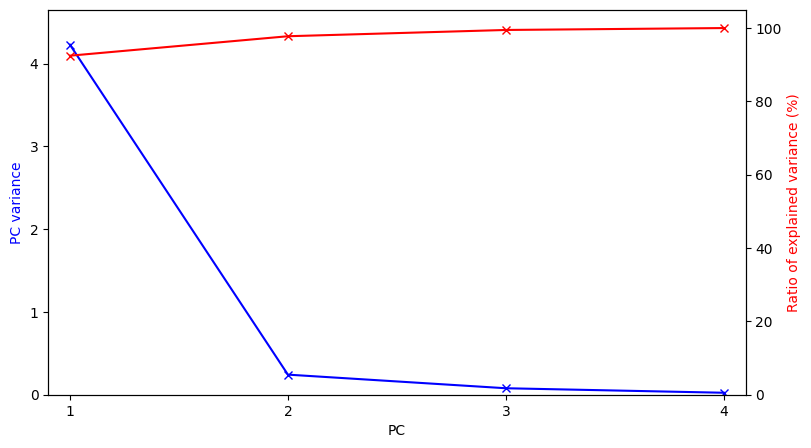

In [20]:
# The diagonal elements of covariance matrix are variances; thus each feature contributes its real variance in PCA.
# Scree plot

Scree(explained_variance_ratio_c, variance_V_c)

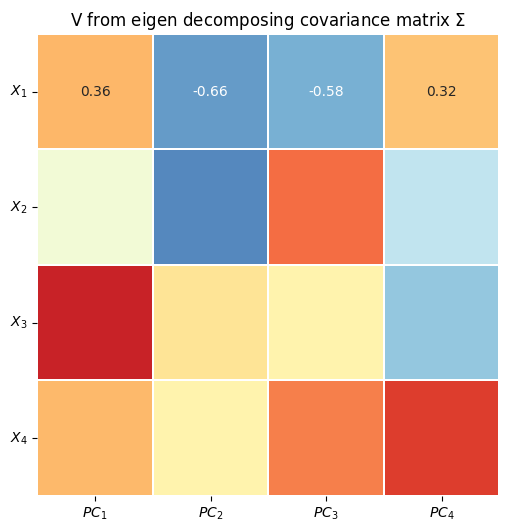

In [21]:
heatmap_V(V_c,X,'V from eigen decomposing covariance matrix $\Sigma$')

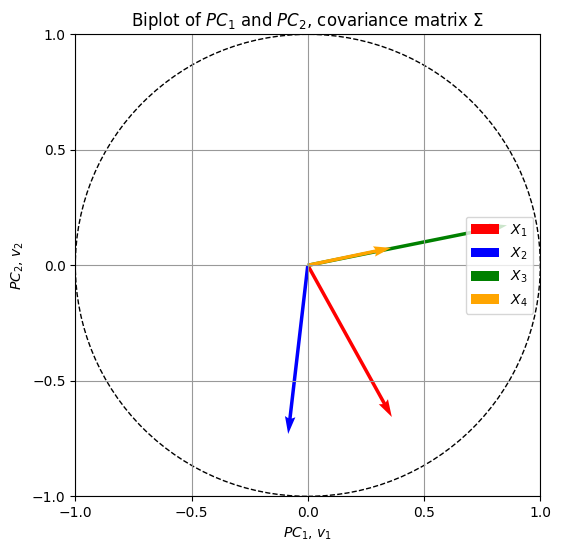

In [22]:
# biplot of the coefficients in PC1 (v1) and PC2 (v2)

biplot(V_c,X,'Biplot of $PC_1$ and $PC_2$, covariance matrix $\Sigma$')

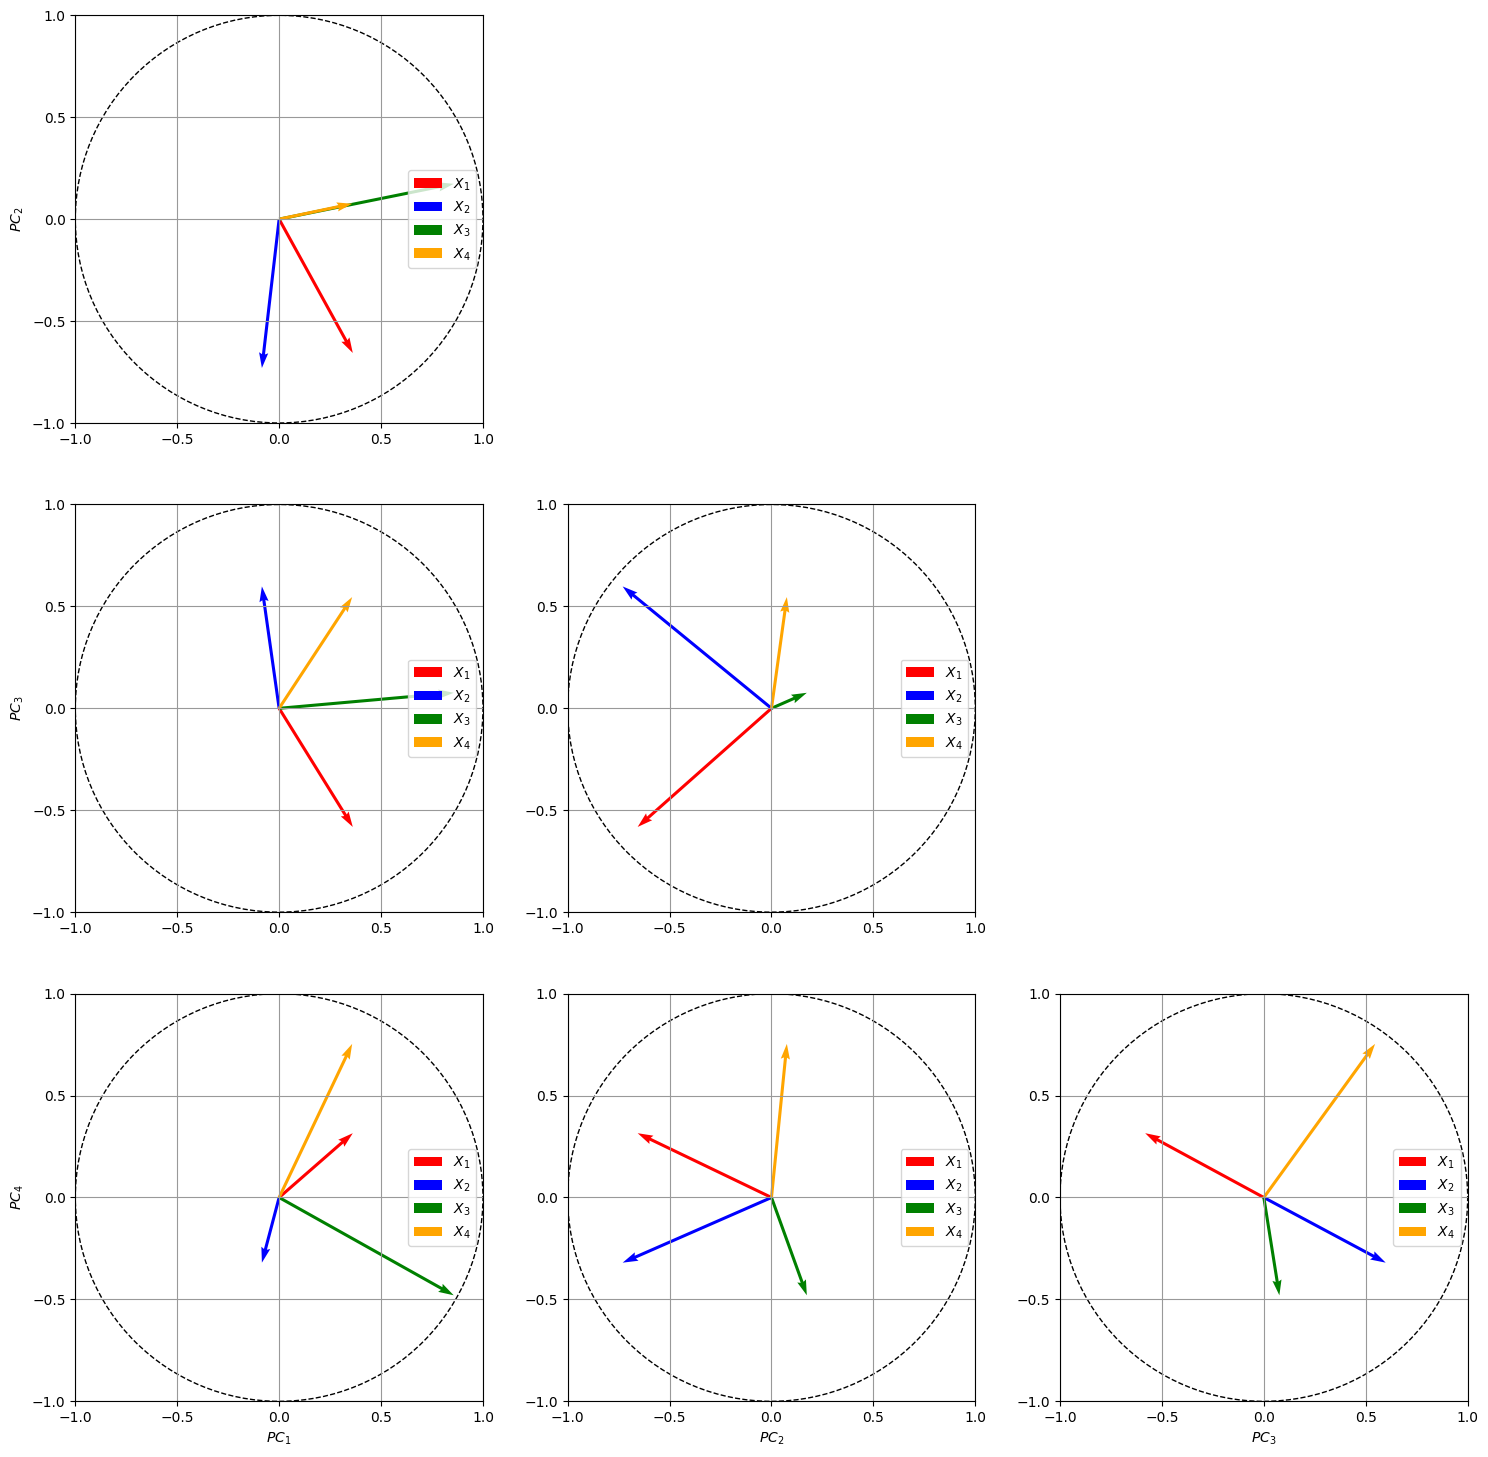

In [23]:
# Note: the center of the vectors ideally should be at the centroid of the data matrix X

# six biplots in lower triangle

six_biplots(V_c,X)

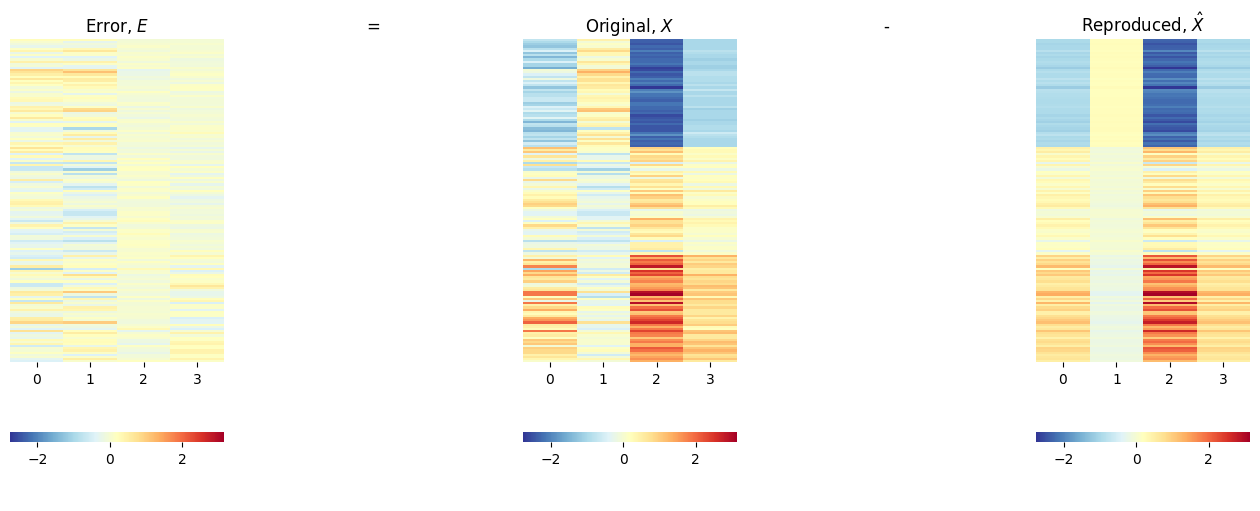

In [24]:
# Reproduce X_c using PC1 from V_c only and plot error heatmap

# X_c_ = X - X.mean() # for test only
error_heatmap(X_c, V_c, 1)

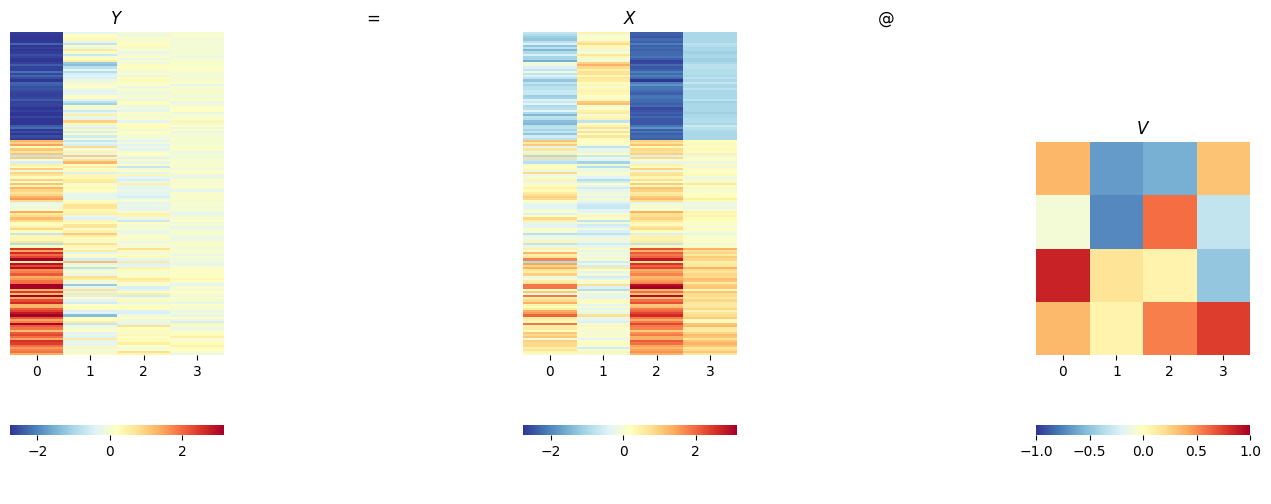

In [25]:
# projection Y_c = X_c @ V_c
# Y_c = X_c @ V_c
projection_heatmap(X_c,V_c)

## 第二条技术路线

In [26]:
#%%
# ==================================================
# Perform PCA on the original data
# by eigen decomposing Gram matrix G = X.T@X
# ==================================================

explained_variance_ratio, variance_V, V, original_variance, GG, X_ = PCA(X, method = 'original')

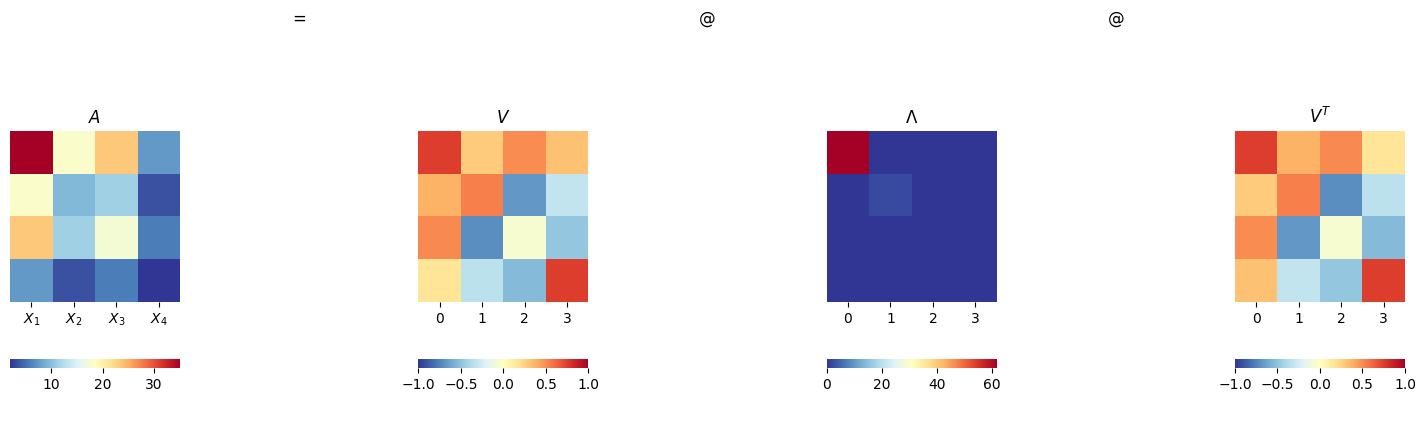

In [27]:
# heatmap of EVD
heatmap_EVD(GG,variance_V,V)

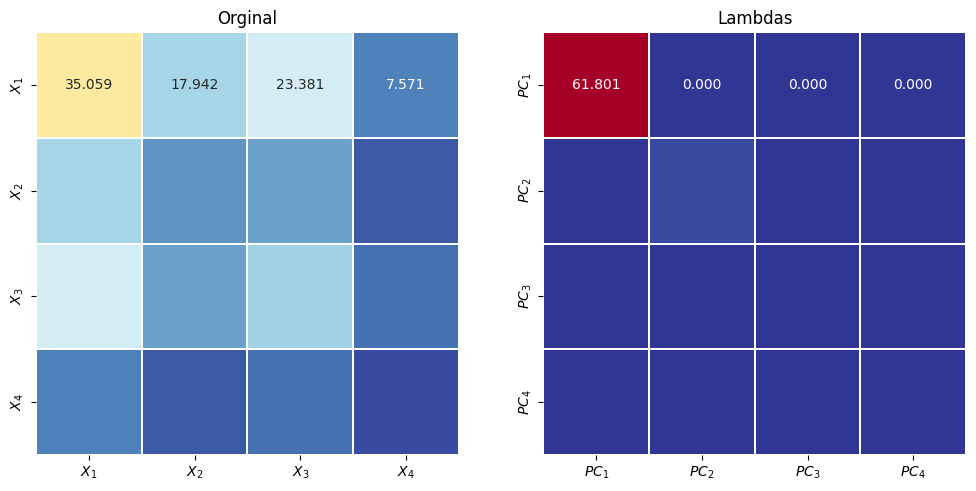

In [28]:
# heatmap of before and after eigen decomposition

heatmap_GG(GG, variance_V)

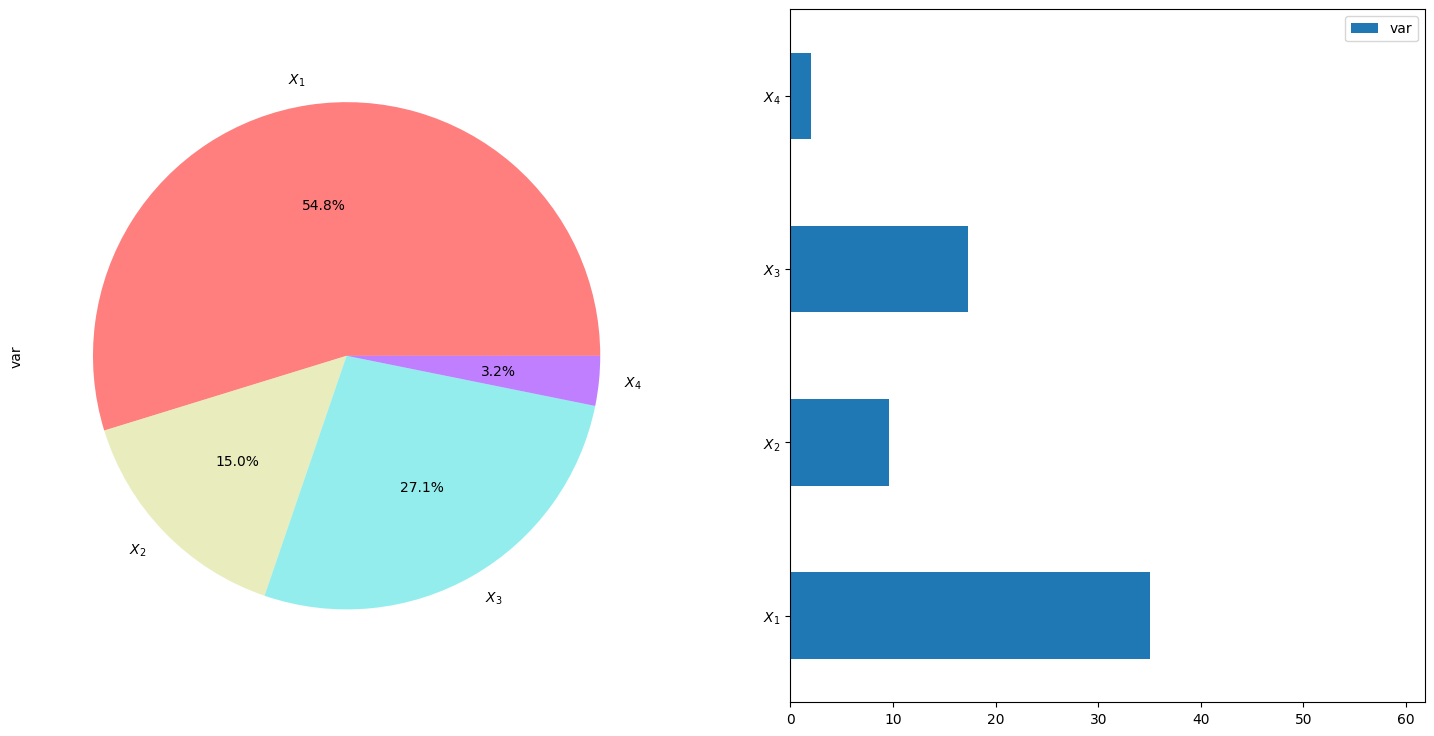

In [29]:
# Note: results in variance_V are L2 norm squared devided by (n-1), not variances

# pie and bar charts

bar_max = np.maximum(original_variance, variance_V).max().max()

pie_and_barh(original_variance, bar_max, PCA = False)

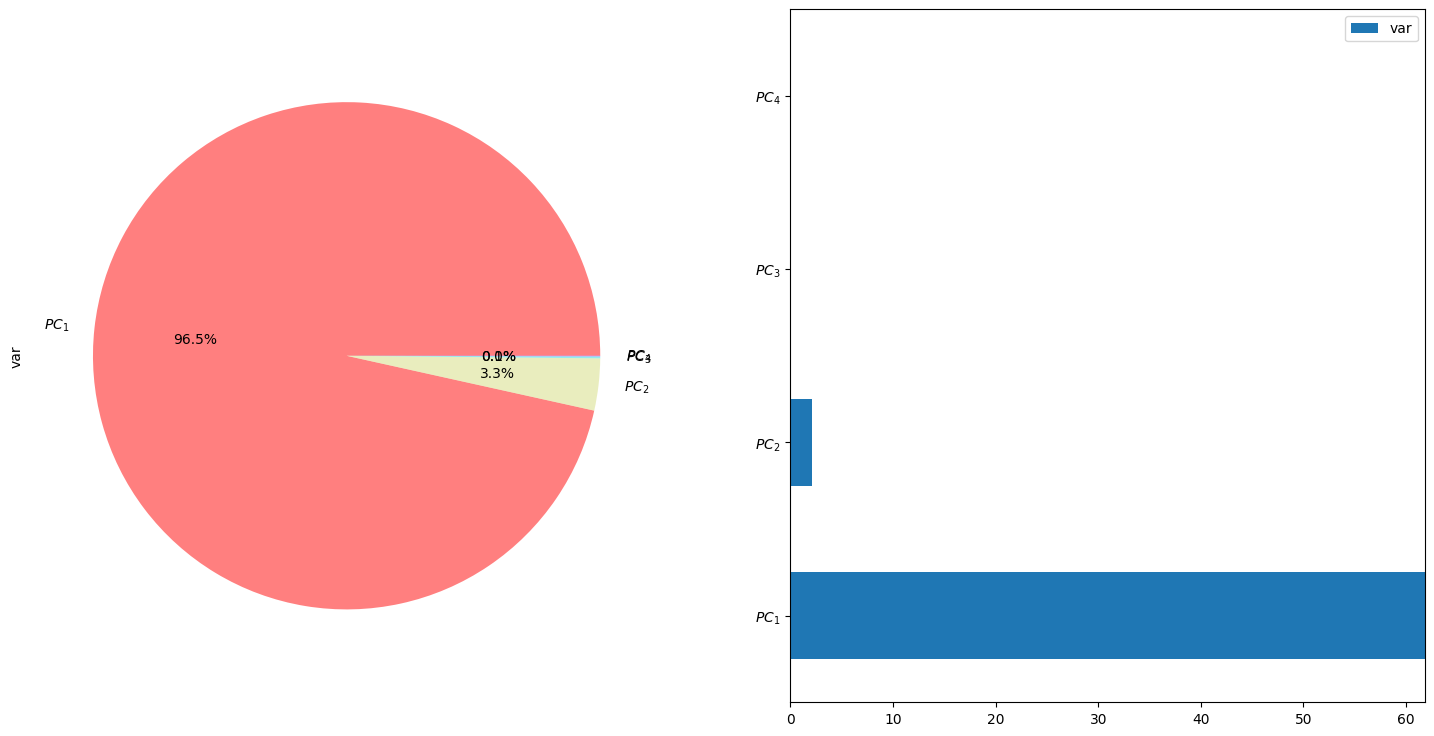

In [30]:
pie_and_barh(variance_V, bar_max,PCA = True)

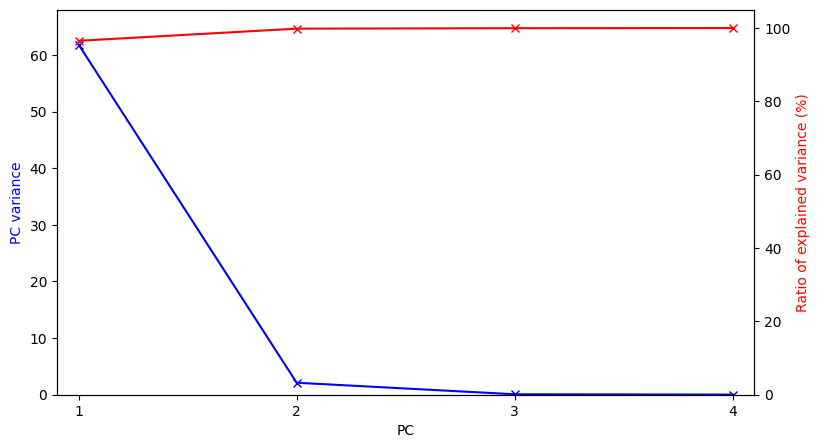

In [31]:
# Scree plot

Scree(explained_variance_ratio,variance_V)

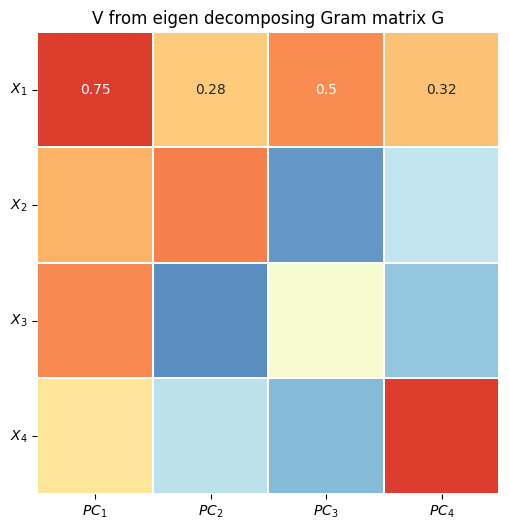

In [32]:
# Heatmap of V

heatmap_V(V,X,'V from eigen decomposing Gram matrix G')

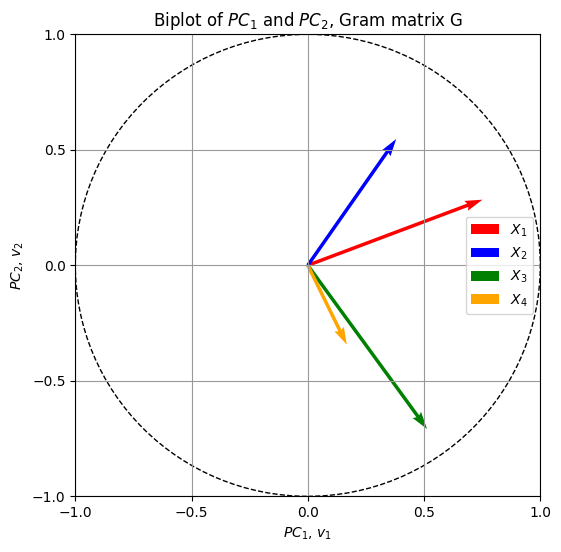

In [33]:
# biplot of the coefficients in PC1 (v1) and PC2 (v2)

biplot(V,X,'Biplot of $PC_1$ and $PC_2$, Gram matrix G')

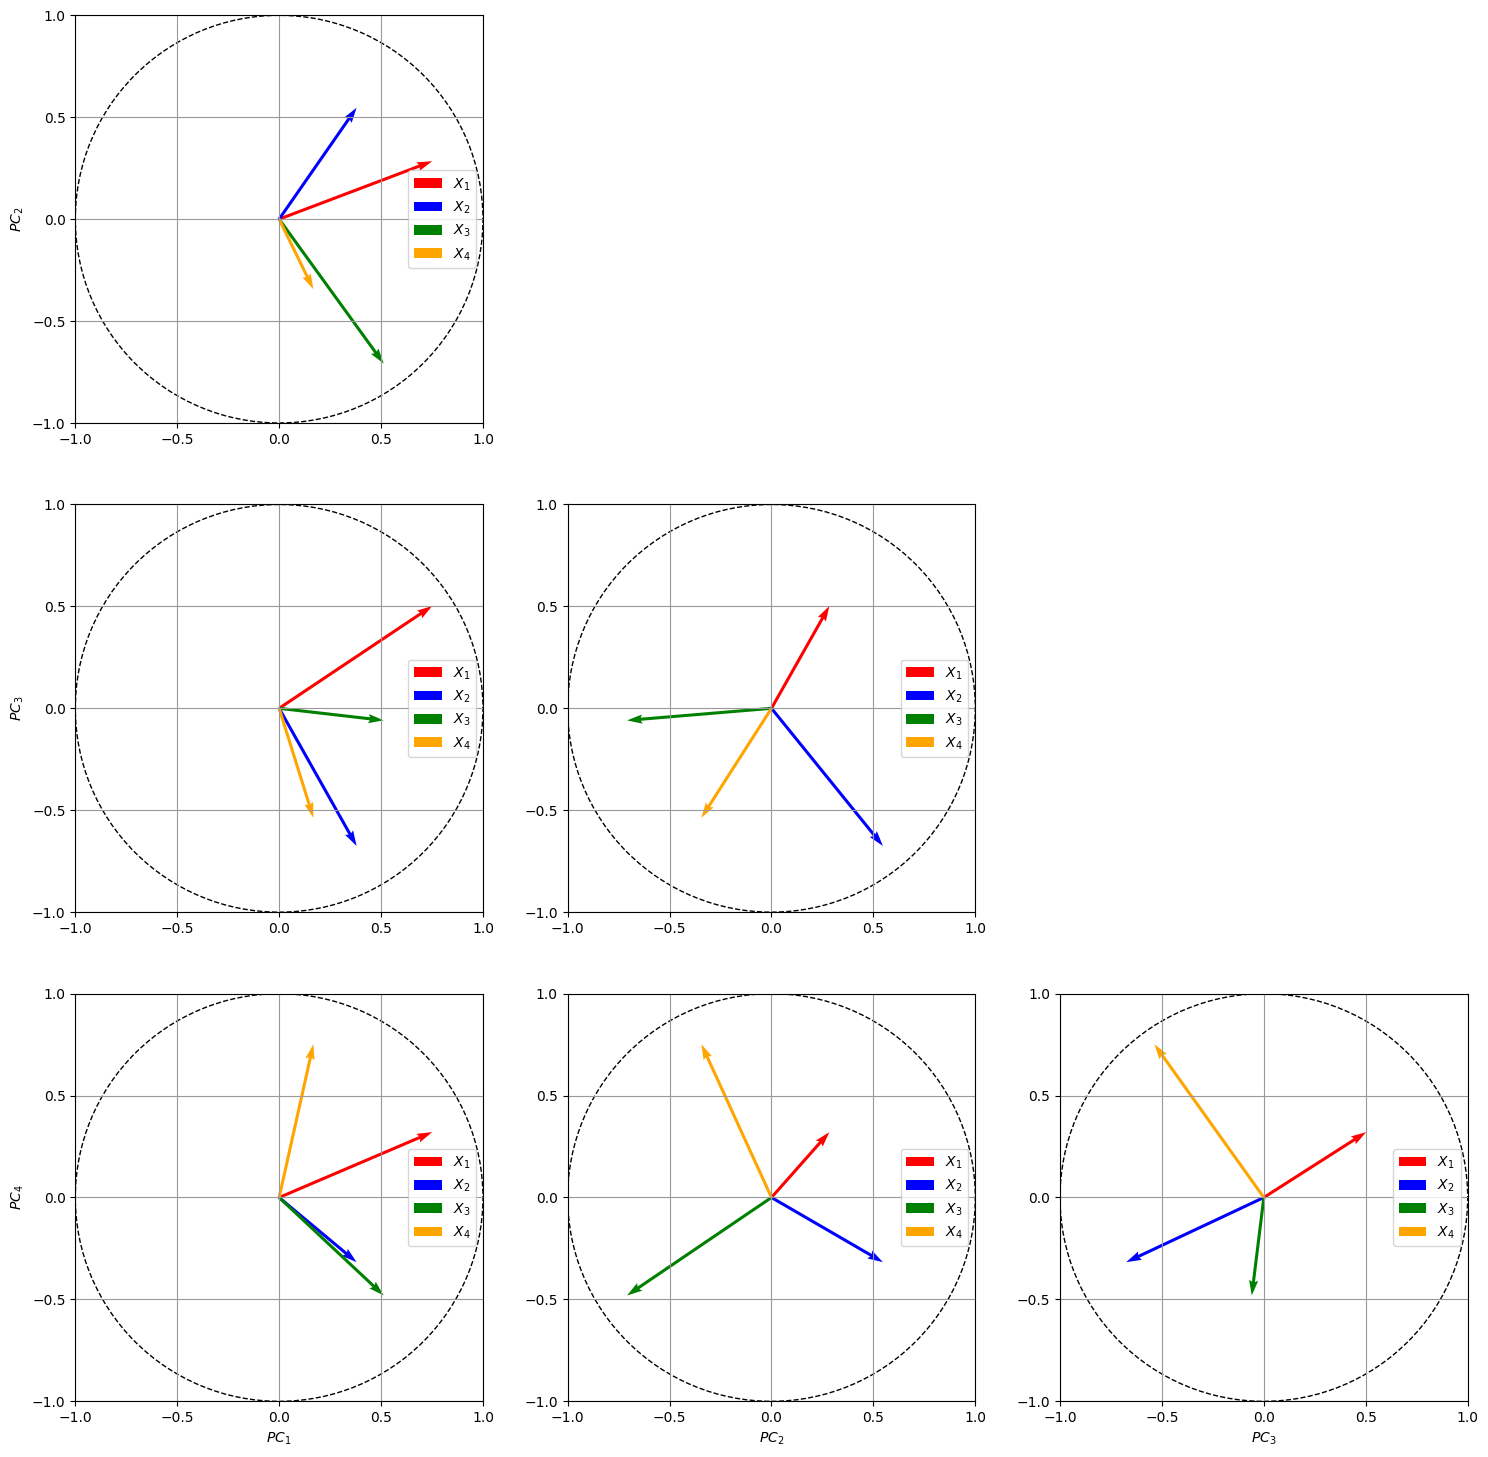

In [34]:
# six biplots in lower triangle

six_biplots(V,X)

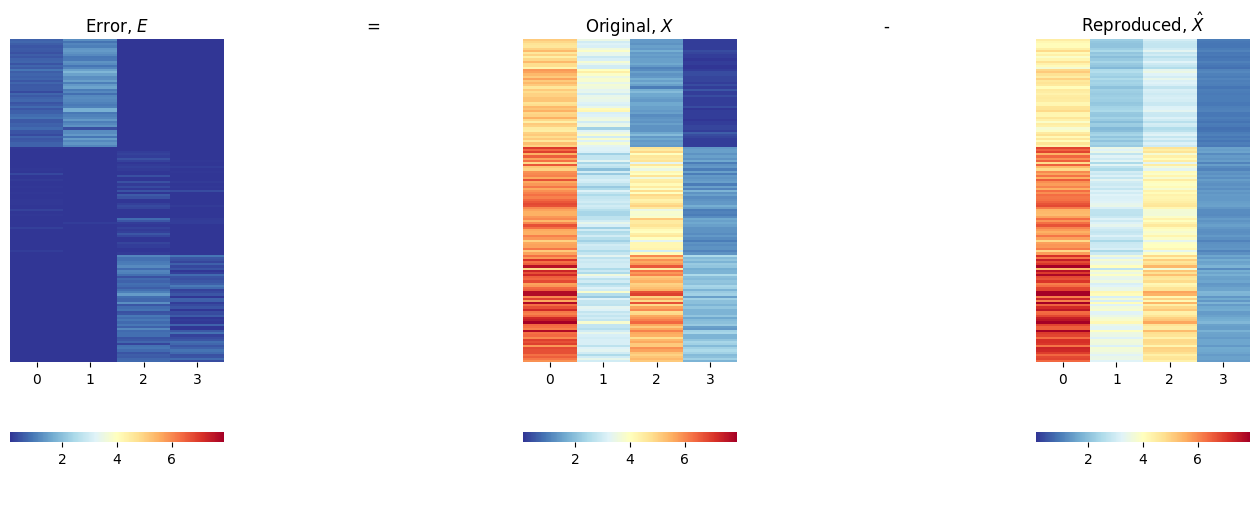

In [35]:
# reproduction

# Reproduce the original data using PC1 from V only and plot error heatmap

error_heatmap(X, V, 1)

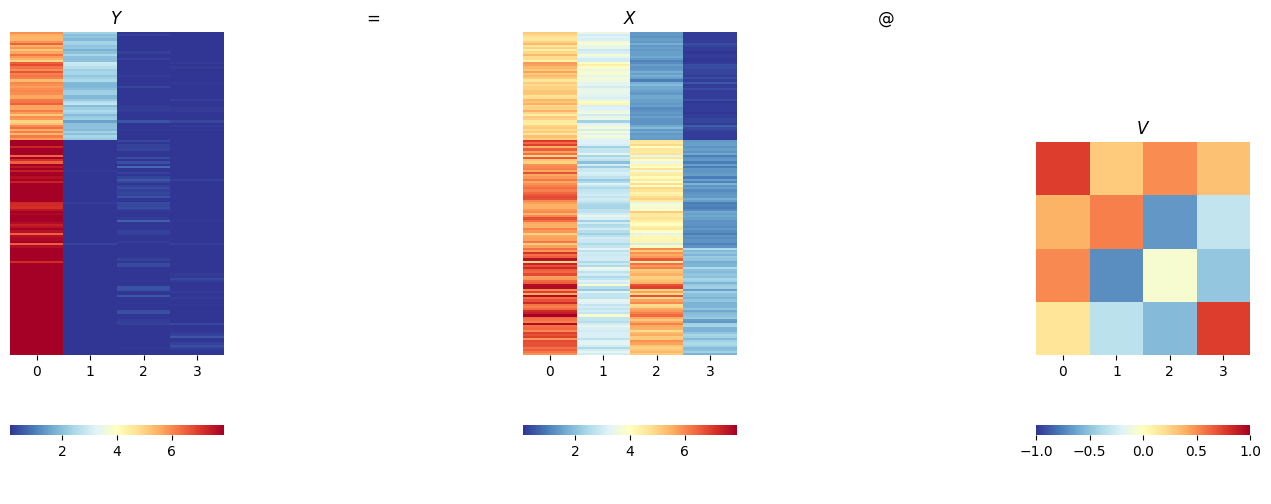

In [36]:
# projection Y = X @ V
# Y = X @ V
# Y_c_2 = X @ V_c
projection_heatmap(X,V)

## 第三条技术路线

In [37]:
#%%

# ==================================================
# Perform PCA on the normalized (or standardized) data, i.e., z-scores
# by eigen decomposing correlation matrix
# ==================================================

explained_variance_ratio_z, variance_V_z, V_z,original_variance_z, GG_z, Z  = PCA(X, method = 'normalize')

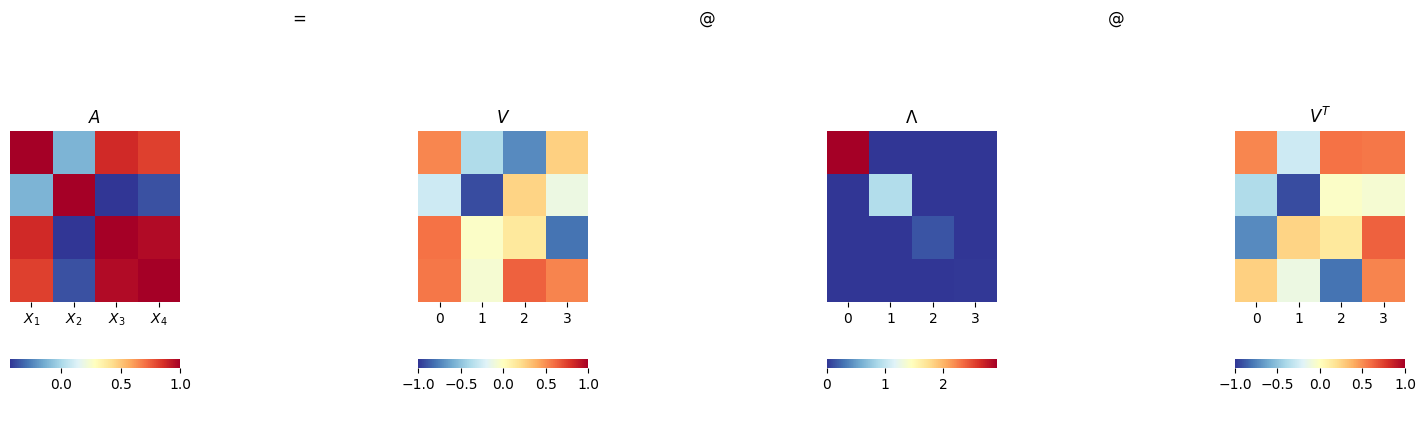

In [38]:
# heatmap of EVD
heatmap_EVD(GG_z,variance_V_z,V_z)

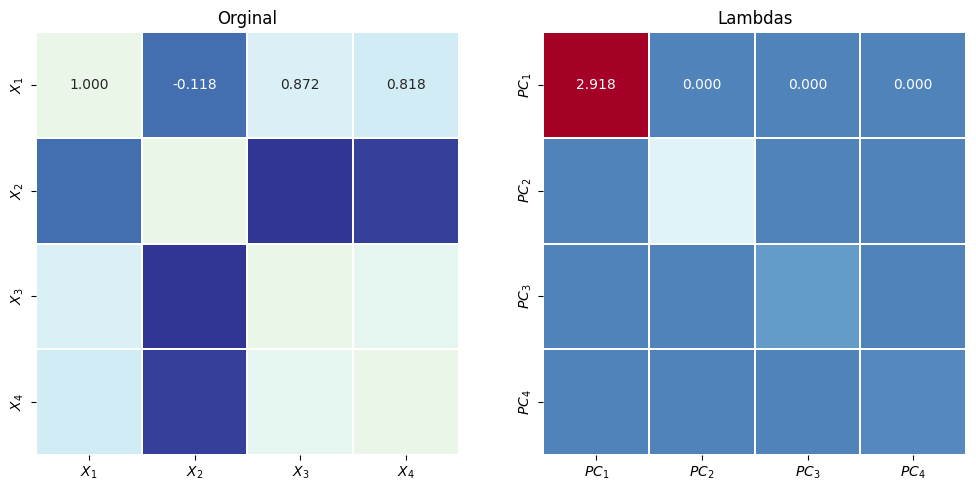

In [39]:
# heatmap of before and after eigen decomposition

heatmap_GG(GG_z, variance_V_z)

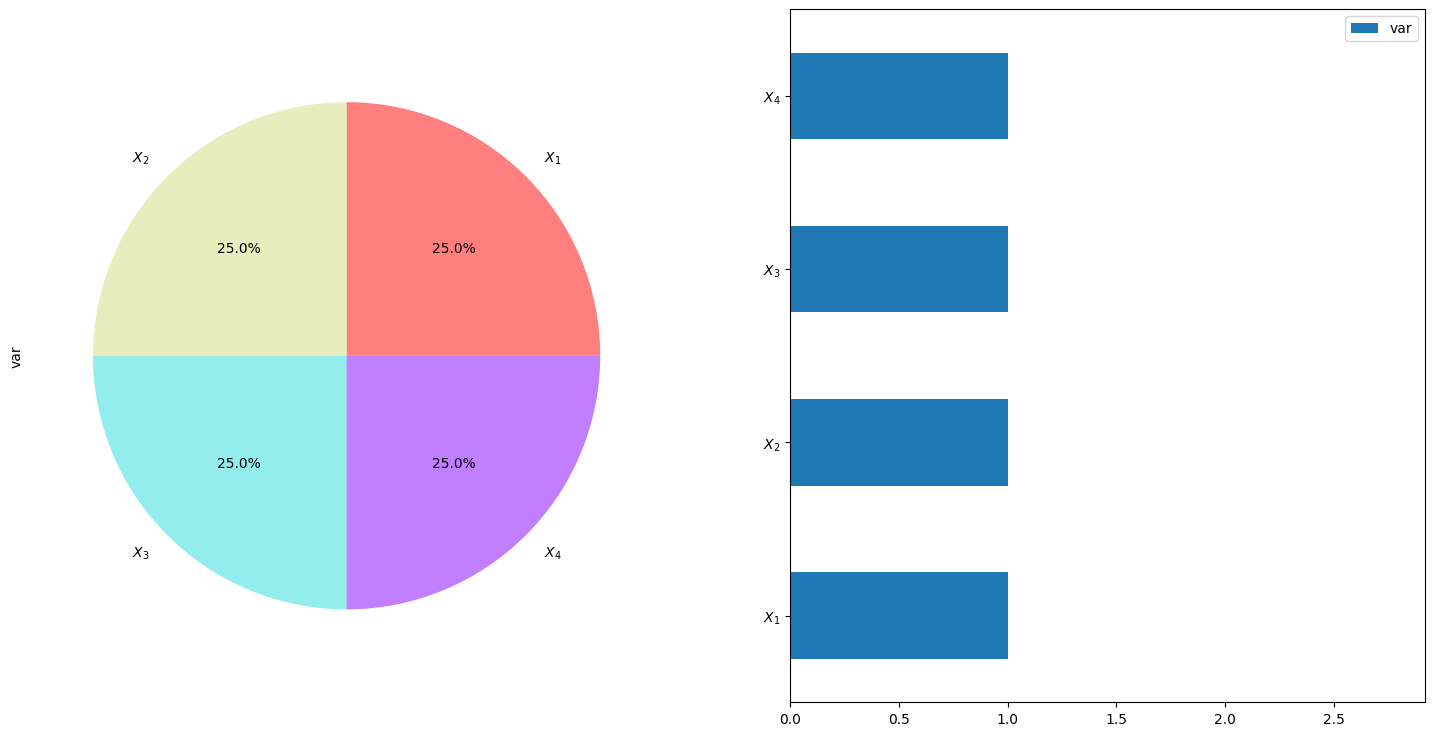

In [40]:
# The diagonal elements of correlation matrix are all 1; thus each feature only contribute 1 as variance in PCA.
bar_max = np.maximum(original_variance_z, variance_V_z).max().max()
pie_and_barh(original_variance_z,bar_max,PCA = False)

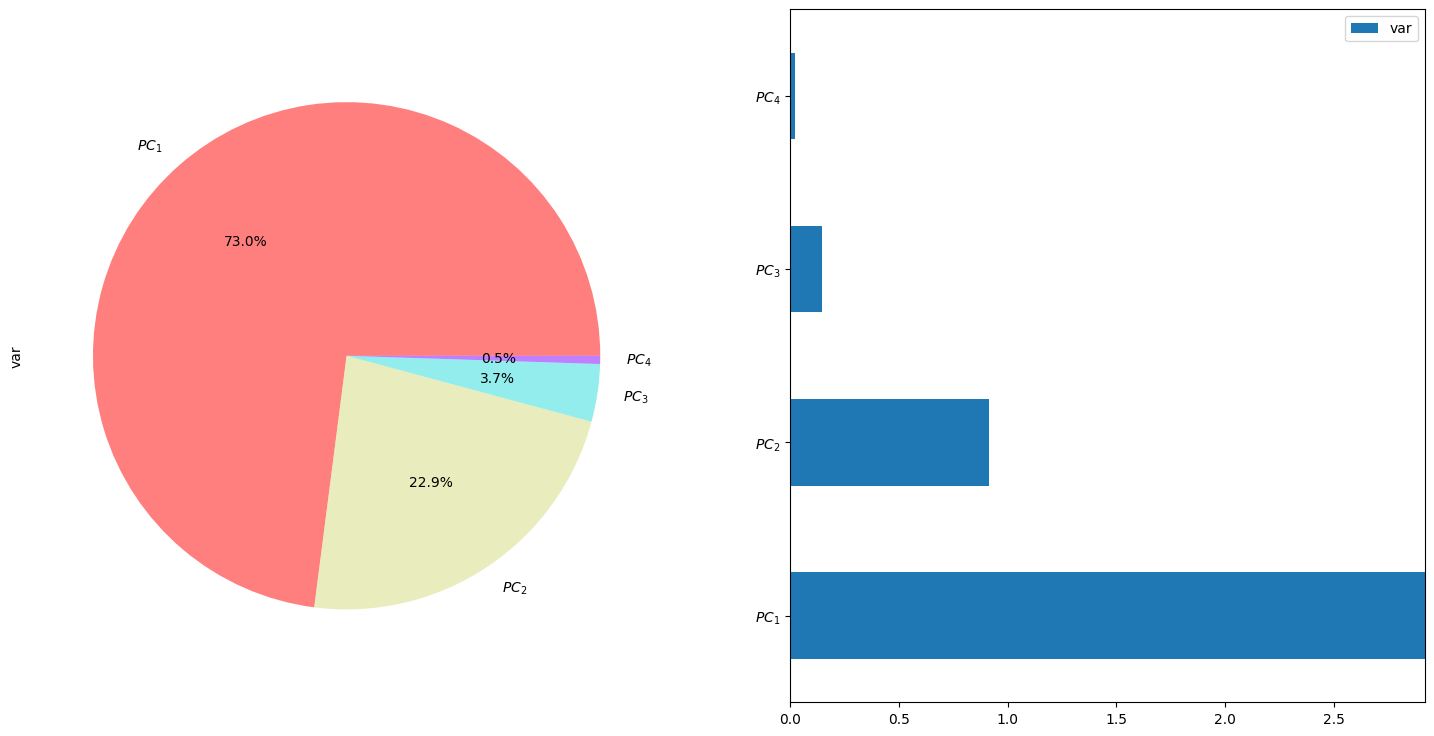

In [41]:
pie_and_barh(variance_V_z,bar_max,PCA = True)

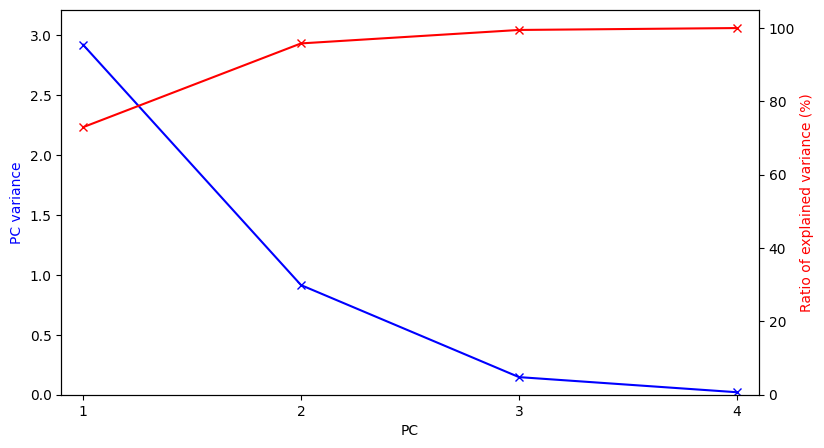

In [42]:
variance_V_z.sum()

Scree(explained_variance_ratio_z, variance_V_z)

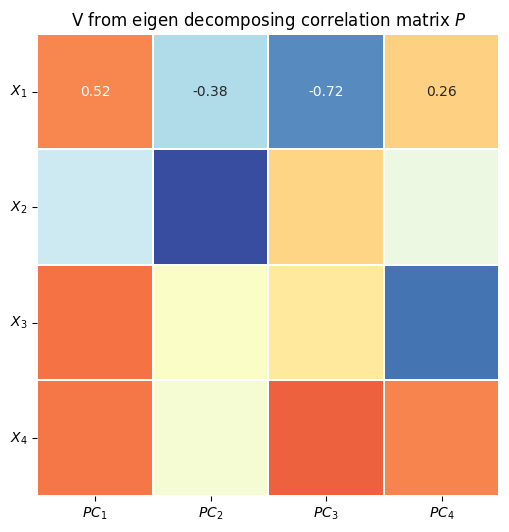

In [43]:
heatmap_V(V_z,X,'V from eigen decomposing correlation matrix $P$')

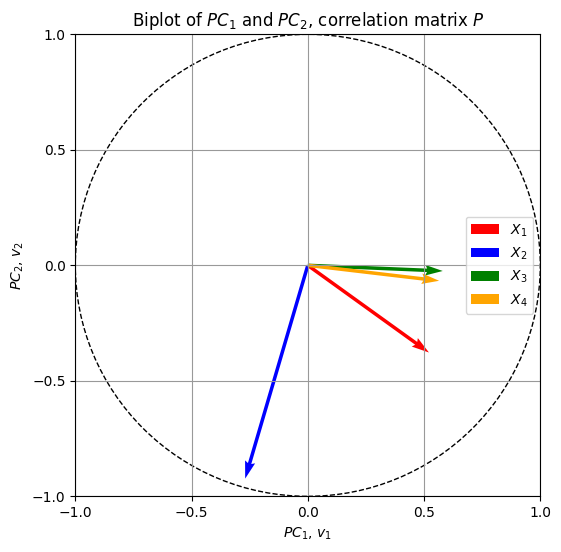

In [44]:
# biplot of the coefficients in PC1 (v1) and PC2 (v2)

biplot(V_z,X,'Biplot of $PC_1$ and $PC_2$, correlation matrix $P$')

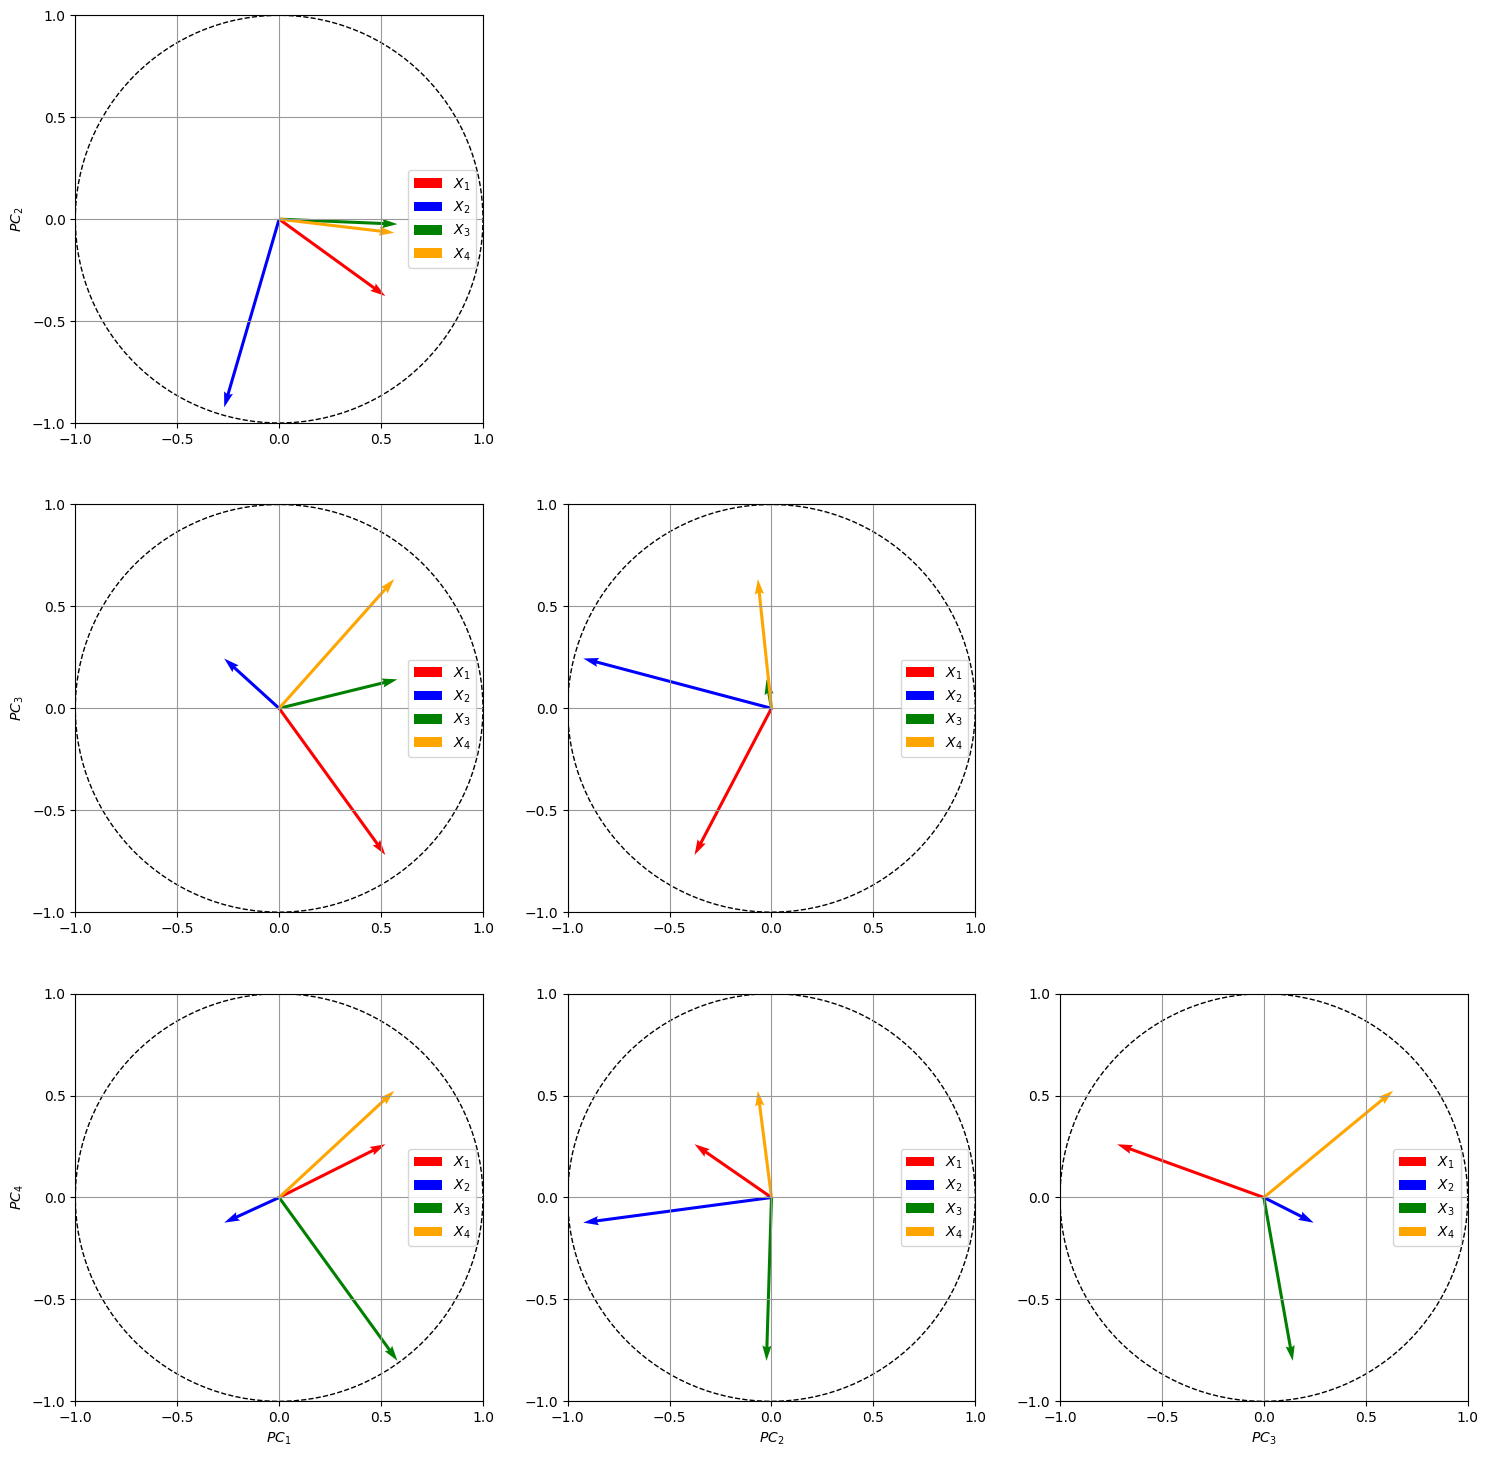

In [45]:
# six biplots in lower triangle

six_biplots(V_z,X)

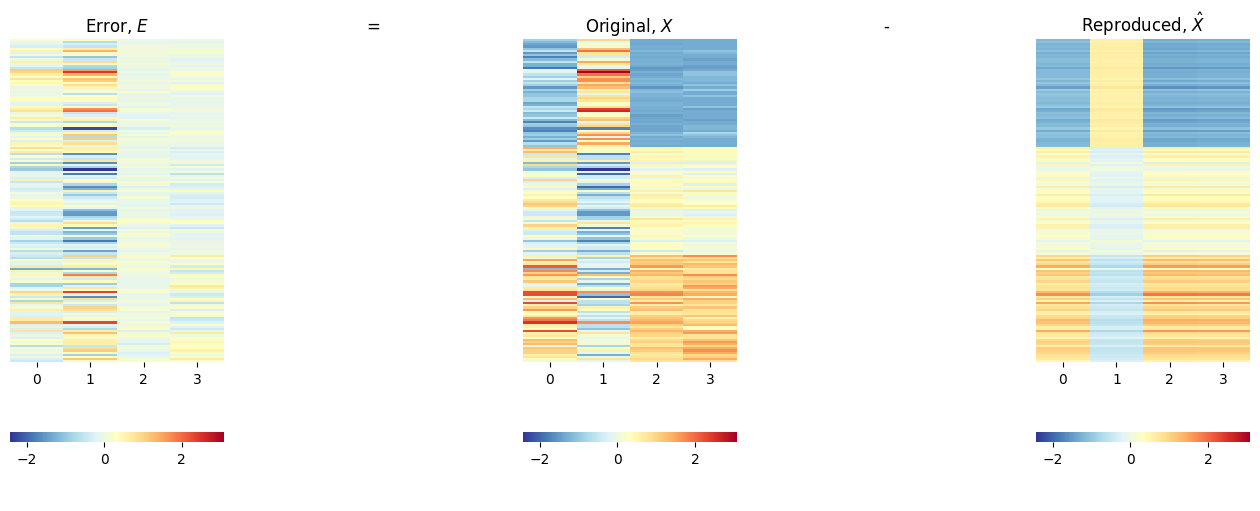

In [46]:
# Reproduce the original data using PC1 from V_z only and plot error heatmap

error_heatmap(Z, V_z, 1)

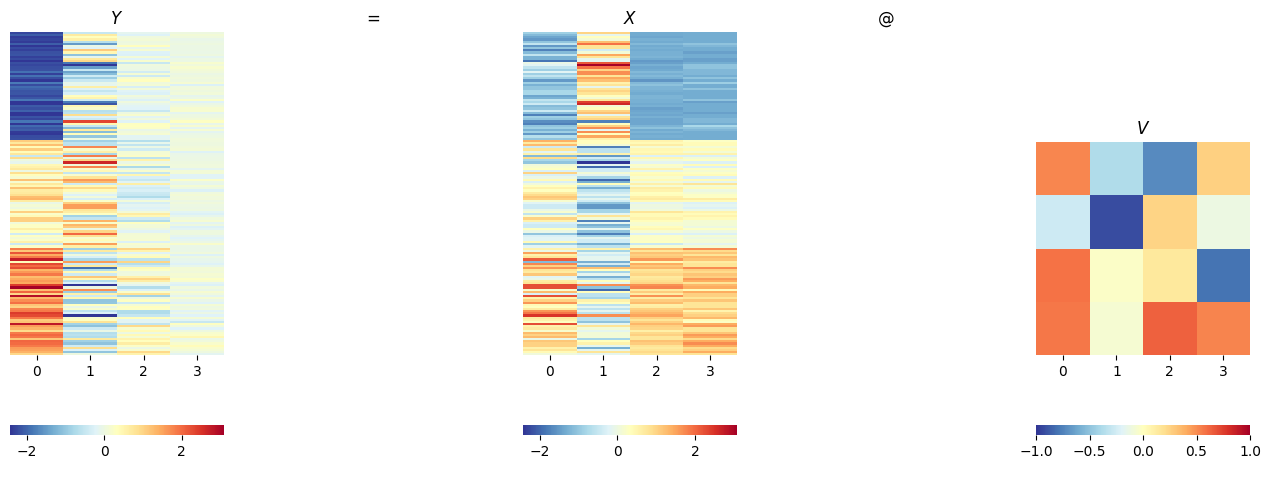

In [47]:
# projection Y_z = Z @ V_z

projection_heatmap(Z,V_z)